# Importing Library

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import shap
import gradio as gr
import traceback, sys

import sklearn
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVR

# Importing Dataset
The dataset was collected from Domain AU via Octoparse. The dataset was filtered out to 3 suburbs in Melbourne such as SouthBank, South Yarra, and Docklands.

In [104]:
df = pd.read_csv(r"D:\University\Year 2\SIT307 - Machine Learning\Melbourne_Housing_Data_Domain.csv")

In [105]:
df.head(10)

,Title,Title_URL,cssiqrvhs,cssiqrvhs5,cssiqrvhs6,cssiqrvhs7,css1ie6g1l,css1ie6g1l8,css1ie6g1l9,css11n8uyu
0,Sale By EOI,https://www.domain.com.au/99-22-kavanagh-stree...,"99/22 Kavanagh Street,",SOUTHBANK,VIC,3006.0,1\nBed,1\nBath,1\nParking,Apartment / Unit / Flat
1,"$1,490,000 - $1,590,000",https://www.domain.com.au/301-10-bond-street-s...,"301/10 Bond Street,",SOUTH YARRA,VIC,3141.0,3\nBeds,3\nBaths,2\nParking,Apartment / Unit / Flat
2,"$3,500,000 - $3,800,000",https://www.domain.com.au/2406-229-toorak-road...,"2406/229 Toorak Road,",SOUTH YARRA,VIC,3141.0,4\nBeds,5\nBaths,4\nParking,Apartment / Unit / Flat
3,"$1,850,000 - $2,000,000",https://www.domain.com.au/1a-powell-street-sou...,"1A Powell Street,",SOUTH YARRA,VIC,3141.0,3\nBeds,3\nBaths,1\nParking,House
4,"$558,000",https://www.domain.com.au/3111-9-power-street-...,"3111/9 Power Street,",SOUTHBANK,VIC,3006.0,2\nBeds,1\nBath,− Parking,Apartment / Unit / Flat
5,Private Sale,https://www.domain.com.au/19-avoca-street-sout...,"19 Avoca Street,",SOUTH YARRA,VIC,3141.0,4\nBeds,5\nBaths,4\nParking,House
6,Expressions of interest,https://www.domain.com.au/6601-35-queensbridge...,"6601/35 Queensbridge Street,",SOUTHBANK,VIC,3006.0,4\nBeds,4\nBaths,5\nParking,Apartment / Unit / Flat
7,"$1,680,000",https://www.domain.com.au/2105-43-hancock-stre...,"2105/43 Hancock Street,",SOUTHBANK,VIC,3006.0,3\nBeds,3\nBaths,2\nParking,Apartment / Unit / Flat
8,"$2,275,000 - $2,500,000",https://www.domain.com.au/8701-70-southbank-bo...,"8701/70 Southbank Boulevard,",SOUTHBANK,VIC,3006.0,3\nBeds,3\nBaths,2\nParking,Apartment / Unit / Flat
9,"$329,000",https://www.domain.com.au/1917-3-yarra-street-...,"1917/3 Yarra Street,",SOUTH YARRA,VIC,3141.0,1\nBed,1\nBath,− Parking,Apartment / Unit / Flat


In [106]:
df.shape

(720, 10)

In [107]:
df.columns.tolist()

['Title',
 'Title_URL',
 'cssiqrvhs',
 'cssiqrvhs5',
 'cssiqrvhs6',
 'cssiqrvhs7',
 'css1ie6g1l',
 'css1ie6g1l8',
 'css1ie6g1l9',
 'css11n8uyu']

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        720 non-null    object 
 1   Title_URL    720 non-null    object 
 2   cssiqrvhs    720 non-null    object 
 3   cssiqrvhs5   612 non-null    object 
 4   cssiqrvhs6   612 non-null    object 
 5   cssiqrvhs7   612 non-null    float64
 6   css1ie6g1l   720 non-null    object 
 7   css1ie6g1l8  720 non-null    object 
 8   css1ie6g1l9  720 non-null    object 
 9   css11n8uyu   720 non-null    object 
dtypes: float64(1), object(9)
memory usage: 56.4+ KB


In [109]:
df.isna().sum().sort_values(ascending=False).head()

cssiqrvhs5    108
cssiqrvhs6    108
cssiqrvhs7    108
Title           0
Title_URL       0
dtype: int64

In [110]:
df.nunique().sort_values(ascending=False).head()

Title_URL      720
cssiqrvhs      612
Title          556
css1ie6g1l      10
css1ie6g1l8      9
dtype: int64

In [111]:
df.describe().round(2)

,cssiqrvhs7
count,612.00
mean,3038.35
std,56.99
min,3006.00
25%,3006.00
50%,3008.00
75%,3008.00
max,3141.00


In [112]:
df.head(3), df.shape, df.columns.tolist()

(                      Title  \
 0              Sale By EOI    
 1  $1,490,000 - $1,590,000    
 2  $3,500,000 - $3,800,000    
 
                                            Title_URL                cssiqrvhs  \
 0  https://www.domain.com.au/99-22-kavanagh-stree...  99/22 Kavanagh Street,    
 1  https://www.domain.com.au/301-10-bond-street-s...     301/10 Bond Street,    
 2  https://www.domain.com.au/2406-229-toorak-road...   2406/229 Toorak Road,    
 
     cssiqrvhs5 cssiqrvhs6  cssiqrvhs7 css1ie6g1l css1ie6g1l8 css1ie6g1l9  \
 0    SOUTHBANK        VIC      3006.0     1\nBed     1\nBath  1\nParking   
 1  SOUTH YARRA        VIC      3141.0    3\nBeds    3\nBaths  2\nParking   
 2  SOUTH YARRA        VIC      3141.0    4\nBeds    5\nBaths  4\nParking   
 
                 css11n8uyu  
 0  Apartment / Unit / Flat  
 1  Apartment / Unit / Flat  
 2  Apartment / Unit / Flat  ,
 (720, 10),
 ['Title',
  'Title_URL',
  'cssiqrvhs',
  'cssiqrvhs5',
  'cssiqrvhs6',
  'cssiqrvhs7',
  'css1i

# Rename
We rename the columns' name so that it will be more readable.

In [114]:
rename_map = {
    "Title": "price_text",
    "Title_URL": "url",
    "cssiqrvhs":    "street_address", 
    "cssiqrvhs5":   "suburb",        
    "cssiqrvhs6":   "state",          
    "cssiqrvhs7":   "postcode",       
    "css1ie6g1l":   "beds_text",    
    "css1ie6g1l8":  "baths_text",     
    "css1ie6g1l9":  "parking_text",   
    "css11n8uyu":   "property_type"   
}

df = df.rename(columns=rename_map)
df.columns.tolist()

['price_text',
 'url',
 'street_address',
 'suburb',
 'state',
 'postcode',
 'beds_text',
 'baths_text',
 'parking_text',
 'property_type']

# Cleaning the Dataset
In this part, we focused on cleaning and preparing the raw property dataset to make it consistent and ready for analysis.

In [116]:
text_cols = ["price_text","url","street_address","suburb","state",
             "beds_text","baths_text","parking_text","property_type"]

for c in text_cols:
    if c in df.columns:
        df[c] = (
            df[c].astype(str)
                 .str.replace(r"\s+", " ", regex=True)   # collapse \n etc.
                 .str.strip()
                 .replace({"nan": np.nan})               # undo "nan" strings
        )

if "suburb" in df: df["suburb"] = df["suburb"].str.title()
if "state" in df:  df["state"]  = df["state"].str.upper()

# Normalise some property_type phrasing a bit
if "property_type" in df:
    df["property_type"] = (df["property_type"]
                           .str.replace("Apartment / Unit / Flat","Apartment/Unit/Flat", regex=False)
                           .str.title())


# postcode cleaning 
if "postcode" in df:
    df["postcode"] = pd.to_numeric(df["postcode"], errors="coerce").astype("Int64")

In [117]:
def parse_price(text):

    nums = [int(x.replace(",", "")) 
            for x in re.findall(r"\$?\s*([0-9][0-9,]{2,})", str(text))]
    if not nums:
        return pd.Series([pd.NA, pd.NA, pd.NA])
    lo, hi = min(nums), max(nums)
    mid = int(round((lo + hi) / 2))  # simple midpoint estimate
    return pd.Series([lo, hi, mid])

df[["price_min","price_max","price_estimate"]] = df["price_text"].apply(parse_price)
df[["price_min","price_max","price_estimate"]] = df[["price_min","price_max","price_estimate"]].astype("Int64")


In [118]:
df["street_address"] = df["street_address"].str.replace(r",\s*$", "", regex=True)

df["full_address"] = (
    df["street_address"].fillna("") + ", " +
    df["suburb"].fillna("") + ", " +
    df["state"].fillna("") + " " +
    df["postcode"].astype("string").fillna("")
).str.replace(r"\s+,", ",", regex=True).str.strip(" ,")

In [119]:
data = df.copy()

In [120]:
def first_int(s):
    m = re.search(r"(\d+)", str(s))
    return int(m.group(1)) if m else np.nan

data["bedrooms"]  = data["beds_text"].apply(first_int).astype("Int64")
data["bathrooms"] = data["baths_text"].apply(first_int).astype("Int64")

def parse_car_spaces(s):
    s = str(s).strip()
    if s == "" or s.lower() == "nan": return np.nan
    if s.startswith("-") or s.startswith("–"): return 0
    m = re.search(r"(\d+)", s)
    return int(m.group(1)) if m else np.nan

data["car_spaces"] = data["parking_text"].apply(parse_car_spaces).astype("Int64")

In [121]:
data[["beds_text","bedrooms","baths_text","bathrooms","parking_text","car_spaces"]].head(10)

,beds_text,bedrooms,baths_text,bathrooms,parking_text,car_spaces
0,1 Bed,1,1 Bath,1,1 Parking,1
1,3 Beds,3,3 Baths,3,2 Parking,2
2,4 Beds,4,5 Baths,5,4 Parking,4
3,3 Beds,3,3 Baths,3,1 Parking,1
4,2 Beds,2,1 Bath,1,− Parking,<NA>
5,4 Beds,4,5 Baths,5,4 Parking,4
6,4 Beds,4,4 Baths,4,5 Parking,5
7,3 Beds,3,3 Baths,3,2 Parking,2
8,3 Beds,3,3 Baths,3,2 Parking,2
9,1 Bed,1,1 Bath,1,− Parking,<NA>


In [122]:
((data[["bedrooms","bathrooms","car_spaces"]].notna().mean()*100)
 .round(1))

bedrooms      100.0
bathrooms     100.0
car_spaces     72.5
dtype: float64

In [123]:
keep_cols = [
    "url","full_address","street_address","suburb","state","postcode",
    "property_type","bedrooms","bathrooms","car_spaces",
    "price_text","price_min","price_max","price_estimate"
]
keep_cols = [c for c in keep_cols if c in data.columns]

clean = data[keep_cols].copy()
print("Clean shape:", clean.shape)
clean.head()

Clean shape: (720, 14)


,url,full_address,street_address,suburb,state,postcode,property_type,bedrooms,bathrooms,car_spaces,price_text,price_min,price_max,price_estimate
0,https://www.domain.com.au/99-22-kavanagh-stree...,"99/22 Kavanagh Street, Southbank, VIC 3006",99/22 Kavanagh Street,Southbank,VIC,3006,Apartment/Unit/Flat,1,1,1,Sale By EOI,<NA>,<NA>,<NA>
1,https://www.domain.com.au/301-10-bond-street-s...,"301/10 Bond Street, South Yarra, VIC 3141",301/10 Bond Street,South Yarra,VIC,3141,Apartment/Unit/Flat,3,3,2,"$1,490,000 - $1,590,000",1490000,1590000,1540000
2,https://www.domain.com.au/2406-229-toorak-road...,"2406/229 Toorak Road, South Yarra, VIC 3141",2406/229 Toorak Road,South Yarra,VIC,3141,Apartment/Unit/Flat,4,5,4,"$3,500,000 - $3,800,000",3500000,3800000,3650000
3,https://www.domain.com.au/1a-powell-street-sou...,"1A Powell Street, South Yarra, VIC 3141",1A Powell Street,South Yarra,VIC,3141,House,3,3,1,"$1,850,000 - $2,000,000",1850000,2000000,1925000
4,https://www.domain.com.au/3111-9-power-street-...,"3111/9 Power Street, Southbank, VIC 3006",3111/9 Power Street,Southbank,VIC,3006,Apartment/Unit/Flat,2,1,<NA>,"$558,000",558000,558000,558000


In [124]:
clean = data[keep_cols].copy() 

# Checking Data Coverage and Filtering Rows
After cleaning the dataset, we evaluated the completeness of each column to check how much data was available. To ensure accurate model training, we filtered out listings that had no target price, keeping only rows where a valid price was available.

In [126]:
coverage = (clean.notna().mean()*100).round(1).sort_values(ascending=False)
coverage

url               100.0
full_address      100.0
street_address    100.0
property_type     100.0
bedrooms          100.0
bathrooms         100.0
price_text        100.0
suburb             85.0
state              85.0
postcode           85.0
price_min          83.5
price_max          83.5
price_estimate     83.5
car_spaces         72.5
dtype: float64

In [127]:
data = clean.copy()

In [128]:
# drop rows with no target price
data = data[data['price_estimate'].notna()].copy()
print("Rows kept:", data.shape[0])
data['suburb'].value_counts()

Rows kept: 601


suburb
Southbank      248
Docklands      162
South Yarra    113
Name: count, dtype: int64

In [129]:
clean.columns.tolist()

['url',
 'full_address',
 'street_address',
 'suburb',
 'state',
 'postcode',
 'property_type',
 'bedrooms',
 'bathrooms',
 'car_spaces',
 'price_text',
 'price_min',
 'price_max',
 'price_estimate']

# Feature Selection and Data Inspection

In [131]:
target = "price_estimate"
feature_cols = ["suburb","postcode","property_type","bedrooms","bathrooms","car_spaces"]

X = clean[feature_cols].copy()
y = clean[target].astype(float).copy()

clean["car_spaces"] = clean["car_spaces"].fillna(0).astype(int)
X.head(), y.head()

(        suburb  postcode        property_type  bedrooms  bathrooms  car_spaces
 0    Southbank      3006  Apartment/Unit/Flat         1          1           1
 1  South Yarra      3141  Apartment/Unit/Flat         3          3           2
 2  South Yarra      3141  Apartment/Unit/Flat         4          5           4
 3  South Yarra      3141                House         3          3           1
 4    Southbank      3006  Apartment/Unit/Flat         2          1        <NA>,
 0          NaN
 1    1540000.0
 2    3650000.0
 3    1925000.0
 4     558000.0
 Name: price_estimate, dtype: float64)

In [132]:
clean.dtypes

url                       object
full_address      string[python]
street_address            object
suburb                    object
state                     object
postcode                   Int64
property_type             object
bedrooms                   Int64
bathrooms                  Int64
car_spaces                 int32
price_text                object
price_min                  Int64
price_max                  Int64
price_estimate             Int64
dtype: object

In [133]:
for col in clean.select_dtypes(include="object").columns:
    print(f"\n{col}:")
    print(clean[col].unique()[:10])   # show first 10 unique values
    print("Unique count:", clean[col].nunique())


url:
['https://www.domain.com.au/99-22-kavanagh-street-southbank-vic-3006-2019250801'
 'https://www.domain.com.au/301-10-bond-street-south-yarra-vic-3141-2019788300'
 'https://www.domain.com.au/2406-229-toorak-road-south-yarra-vic-3141-2019786963'
 'https://www.domain.com.au/1a-powell-street-south-yarra-vic-3141-2019761638'
 'https://www.domain.com.au/3111-9-power-street-southbank-vic-3006-2019257088'
 'https://www.domain.com.au/19-avoca-street-south-yarra-vic-3141-2019202234'
 'https://www.domain.com.au/6601-35-queensbridge-street-southbank-vic-3006-2019124150'
 'https://www.domain.com.au/2105-43-hancock-street-southbank-vic-3006-2018823147'
 'https://www.domain.com.au/8701-70-southbank-boulevard-southbank-vic-3006-2018679842'
 'https://www.domain.com.au/1917-3-yarra-street-south-yarra-vic-3141-2020252809']
Unique count: 720

street_address:
['99/22 Kavanagh Street' '301/10 Bond Street' '2406/229 Toorak Road'
 '1A Powell Street' '3111/9 Power Street' '19 Avoca Street'
 '6601/35 Queen

# Encoding Categorical Features
In this step, we prepared the dataset for machine learning by encoding categorical variables into numerical form. The selected categorical columns were suburb and property_type, while numerical columns included postcode, bedrooms, bathrooms, and car_spaces.

We used one-hot encoding to convert categorical values into binary indicator columns.

In [135]:
cat_cols = ["suburb", "property_type"]
num_cols = ["postcode", "bedrooms", "bathrooms", "car_spaces"]
target = "price_estimate"

In [136]:
X_cat = pd.get_dummies(clean[cat_cols], drop_first=True)  # drop_first 
X_num = clean[num_cols].copy()

X_encoded = pd.concat([X_num, X_cat], axis=1)
X_encoded.head()

,postcode,bedrooms,bathrooms,car_spaces,suburb_South Yarra,suburb_Southbank,property_type_Car Space,property_type_House,property_type_New Apartments / Off The Plan,property_type_New House And Land,property_type_Studio,property_type_Townhouse
0,3006,1,1,1,False,True,False,False,False,False,False,False
1,3141,3,3,2,True,False,False,False,False,False,False,False
2,3141,4,5,4,True,False,False,False,False,False,False,False
3,3141,3,3,1,True,False,False,True,False,False,False,False
4,3006,2,1,0,False,True,False,False,False,False,False,False


In [137]:
print("Before encoding:", clean[cat_cols].nunique())
print("After encoding shape:", X_encoded.shape)
X_encoded.head()


Before encoding: suburb           3
property_type    7
dtype: int64
After encoding shape: (720, 12)


,postcode,bedrooms,bathrooms,car_spaces,suburb_South Yarra,suburb_Southbank,property_type_Car Space,property_type_House,property_type_New Apartments / Off The Plan,property_type_New House And Land,property_type_Studio,property_type_Townhouse
0,3006,1,1,1,False,True,False,False,False,False,False,False
1,3141,3,3,2,True,False,False,False,False,False,False,False
2,3141,4,5,4,True,False,False,False,False,False,False,False
3,3141,3,3,1,True,False,False,True,False,False,False,False
4,3006,2,1,0,False,True,False,False,False,False,False,False


# Integrating School In Victoria Data

In this section, we added another dataset which Victoria School Location 2025 collected from Australian Government Public Dataset (data.gov.au)

In [139]:
schools = pd.read_csv(r"D:\University\Year 2\SIT307 - Machine Learning\VictoriaSchoolLocation2025.csv")
schools.head()

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,...,Postal_State,Postal_Postcode,Full_Phone_No,Region,Area,LGA_ID,LGA_Name,LGA_TYPE,X,Y
0,Catholic,2,20,Parade College,Secondary,O,1436 Plenty Road,NaN,BUNDOORA,VIC,...,VIC,3083,03 9468 3300,NORTH-WESTERN VICTORIA,North Eastern Melbourne,66,Banyule (C),Metro,145.066978,-37.690178
1,Catholic,2,25,Simonds Catholic College,Secondary,O,273 Victoria Street,NaN,WEST MELBOURNE,VIC,...,VIC,3003,03 9321 9200,SOUTH-WESTERN VICTORIA,Western Melbourne,460,Melbourne (C),Metro,144.952883,-37.805971
2,Catholic,2,26,St Mary’s College Melbourne,Secondary,O,11 Westbury Street,NaN,ST KILDA EAST,VIC,...,VIC,3182,03 9529 6611,SOUTH-EASTERN VICTORIA,Bayside Peninsula,590,Port Phillip (C),Metro,144.997001,-37.859365
3,Catholic,2,28,St Patrick's College Ballarat,Secondary,O,1431 Sturt Street,NaN,BALLARAT,VIC,...,VIC,3350,03 5331 1688,SOUTH-WESTERN VICTORIA,Central Highlands,57,Ballarat (C),Non Metro,143.831558,-37.559711
4,Catholic,2,29,St Patrick's School,Primary,O,119 Drummond Street South,NaN,BALLARAT,VIC,...,VIC,3350,03 5332 7680,SOUTH-WESTERN VICTORIA,Central Highlands,57,Ballarat (C),Non Metro,143.847147,-37.564397


In [140]:
schools.columns

Index(['Education_Sector', 'Entity_Type', 'School_No', 'School_Name',
       'School_Type', 'School_Status', 'Address_Line_1', 'Address_Line_2',
       'Address_Town', 'Address_State', 'Address_Postcode',
       'Postal_Address_Line_1', 'Postal_Address_Line_2', 'Postal_Town',
       'Postal_State', 'Postal_Postcode', 'Full_Phone_No', 'Region', 'Area',
       'LGA_ID', 'LGA_Name', 'LGA_TYPE', 'X', 'Y'],
      dtype='object')

# Integrating School Data by Postcode
To enrich our property dataset, we merged it with a schools dataset to include the number of schools located in each postcode

In [142]:
# Count Schools by postcode
school_counts = schools.groupby("Postal_Postcode").size().reset_index(name="num_schools")
school_counts.head()

,Postal_Postcode,num_schools
0,3000,3
1,3003,1
2,3004,4
3,3006,2
4,3008,1


In [143]:
schools.columns = schools.columns.str.strip()

if "Postal_Postcode" in schools.columns:
    school_pc_col = "Postal_Postcode"
elif "Address_Postcode" in schools.columns:
    school_pc_col = "Address_Postcode"
else:
    raise KeyError("No postcode column found in schools dataset.")

schools[school_pc_col] = pd.to_numeric(schools[school_pc_col], errors="coerce").astype("Int64")

schools[[school_pc_col]].head()

,Postal_Postcode
0,3083
1,3003
2,3182
3,3350
4,3350


In [144]:
schools.columns = schools.columns.str.strip()
pc_col = "Postal_Postcode" if "Postal_Postcode" in schools.columns else "Address_Postcode"
schools[pc_col] = pd.to_numeric(schools[pc_col], errors="coerce").astype("Int64")
school_counts = (
    schools.groupby(pc_col)
           .size()
           .reset_index(name="num_schools")
)

if "num_schools" in data.columns:
    data = data.drop(columns=["num_schools"])

if pc_col in data.columns:
    data = data.drop(columns=[pc_col])

# merge
data = data.merge(
    school_counts,
    left_on="postcode",
    right_on=pc_col,
    how="left",
    validate="m:1",   
)

data["num_schools"] = data["num_schools"].fillna(0).astype(int)
data = data.drop(columns=[pc_col], errors="ignore")

# sanity check
data[["suburb","postcode","num_schools"]].head(10)
data["num_schools"].describe()


count    601.000000
mean       2.222962
std        1.937405
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        6.000000
Name: num_schools, dtype: float64

# Integrating Café and Restaurant Data
In this section, we added another dataset which Victoria Cafe and Restaurant, collected from Australian Government Public Dataset (data.gov.au)

In [146]:
cafes = pd.read_csv(r"D:\University\Year 2\SIT307 - Machine Learning\VictoriaCafeandRestaurant.csv")
cafes.columns

Index(['Census year', 'Block ID', 'Property ID', 'Base property ID',
       'Building address', 'CLUE small area', 'Trading name',
       'Business address', 'Industry (ANZSIC4) code',
       'Industry (ANZSIC4) description', 'Seating type', 'Number of seats',
       'Longitude', 'Latitude', 'location'],
      dtype='object')

In [147]:
cafes["postcode"] = cafes["Business address"].str.extract(r"(\d{4})").astype("Int64")

In [148]:
cafes_per_postcode = (
    cafes.groupby("postcode")
         .size()
         .reset_index(name="num_cafes")
)

In [149]:
data = data.merge(
    cafes_per_postcode,
    on="postcode",
    how="left"
)

data["num_cafes"] = data["num_cafes"].fillna(0).astype(int)

In [150]:
data.head(5)    

,url,full_address,street_address,suburb,state,postcode,property_type,bedrooms,bathrooms,car_spaces,price_text,price_min,price_max,price_estimate,num_schools,num_cafes
0,https://www.domain.com.au/301-10-bond-street-s...,"301/10 Bond Street, South Yarra, VIC 3141",301/10 Bond Street,South Yarra,VIC,3141,Apartment/Unit/Flat,3,3,2,"$1,490,000 - $1,590,000",1490000,1590000,1540000,6,340
1,https://www.domain.com.au/2406-229-toorak-road...,"2406/229 Toorak Road, South Yarra, VIC 3141",2406/229 Toorak Road,South Yarra,VIC,3141,Apartment/Unit/Flat,4,5,4,"$3,500,000 - $3,800,000",3500000,3800000,3650000,6,340
2,https://www.domain.com.au/1a-powell-street-sou...,"1A Powell Street, South Yarra, VIC 3141",1A Powell Street,South Yarra,VIC,3141,House,3,3,1,"$1,850,000 - $2,000,000",1850000,2000000,1925000,6,340
3,https://www.domain.com.au/3111-9-power-street-...,"3111/9 Power Street, Southbank, VIC 3006",3111/9 Power Street,Southbank,VIC,3006,Apartment/Unit/Flat,2,1,<NA>,"$558,000",558000,558000,558000,2,3994
4,https://www.domain.com.au/2105-43-hancock-stre...,"2105/43 Hancock Street, Southbank, VIC 3006",2105/43 Hancock Street,Southbank,VIC,3006,Apartment/Unit/Flat,3,3,2,"$1,680,000",1680000,1680000,1680000,2,3994


In [151]:
data.tail(5)    

,url,full_address,street_address,suburb,state,postcode,property_type,bedrooms,bathrooms,car_spaces,price_text,price_min,price_max,price_estimate,num_schools,num_cafes
596,https://www.domain.com.au/4002-241-city-road-s...,"4002/241 City Road, Southbank, VIC 3006",4002/241 City Road,Southbank,VIC,3006,Apartment/Unit/Flat,2,1,1,"$530,000-$583,000 Welcome Offer",530000,583000,556500,2,3994
597,https://www.domain.com.au/514-1-marmion-place-...,"514/1 Marmion Place, Docklands, VIC 3008",514/1 Marmion Place,Docklands,VIC,3008,Apartment/Unit/Flat,1,1,1,"$303,888",303888,303888,303888,1,4911
598,https://www.domain.com.au/2609-18-hoff-bouleva...,"2609/18 Hoff Boulevard, Southbank, VIC 3006",2609/18 Hoff Boulevard,Southbank,VIC,3006,Apartment/Unit/Flat,2,2,<NA>,"$545,000 to $595,000",545000,595000,570000,2,3994
599,https://www.domain.com.au/1807-70-southbank-bo...,"1807/70 Southbank Boulevard, Southbank, VIC 3006",1807/70 Southbank Boulevard,Southbank,VIC,3006,Apartment/Unit/Flat,2,2,<NA>,"Asking price $ 660,000",660000,660000,660000,2,3994
600,https://www.domain.com.au/205s-883-collins-str...,"205S/883 Collins Street, Docklands, VIC 3008",205S/883 Collins Street,Docklands,VIC,3008,Apartment/Unit/Flat,1,1,<NA>,"$440,000 - $480,000",440000,480000,460000,1,4911


In [152]:
data.info()        #check information and type of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             601 non-null    object
 1   full_address    601 non-null    string
 2   street_address  601 non-null    object
 3   suburb          523 non-null    object
 4   state           523 non-null    object
 5   postcode        523 non-null    Int64 
 6   property_type   601 non-null    object
 7   bedrooms        601 non-null    Int64 
 8   bathrooms       601 non-null    Int64 
 9   car_spaces      444 non-null    Int64 
 10  price_text      601 non-null    object
 11  price_min       601 non-null    Int64 
 12  price_max       601 non-null    Int64 
 13  price_estimate  601 non-null    Int64 
 14  num_schools     601 non-null    int32 
 15  num_cafes       601 non-null    int32 
dtypes: Int64(7), int32(2), object(6), string(1)
memory usage: 74.7+ KB


In [153]:
data.describe()  

,postcode,bedrooms,bathrooms,car_spaces,price_min,price_max,price_estimate,num_schools,num_cafes
count,523.0,601.0,601.0,444.0,601.0,601.0,601.0,601.000000,601.000000
mean,3035.787763,1.996672,1.622296,1.405405,1843161.292845,1896453.420965,1869807.357737,2.222962,3035.797005
std,55.294569,1.039225,0.831927,0.782176,17409155.248102,17409793.94731,17408911.542684,1.937405,1973.751417
min,3006.0,0.0,0.0,1.0,520.0,560.0,540.0,0.000000,0.000000
25%,3006.0,1.0,1.0,1.0,480000.0,500000.0,489500.0,1.000000,340.000000
50%,3008.0,2.0,2.0,1.0,640000.0,660000.0,656500.0,2.000000,3994.000000
75%,3008.0,2.0,2.0,2.0,998000.0,1050000.0,1025000.0,2.000000,4911.000000
max,3141.0,16.0,10.0,8.0,425289844.0,425289844.0,425289844.0,6.000000,4911.000000


# Aggregating and Enriching Local Features
After merging the school and café datasets, we analysed the distribution of these features across suburbs. To create richer contextual variables, we aggregated both datasets by postcode. For schools, we computed multiple metrics such as the total number of schools and counts by type: primary, secondary, and as well as by education sector (government, Catholic, and independent).

For cafés and restaurants, we calculated the total number of businesses, the average number of seats, and separate counts for cafés and restaurants based on keyword matches in their industry descriptions.

Finally, these aggregated features were merged back into the main property dataset.

In [155]:
# check basic ranges
data[["num_schools","num_cafes"]].describe()

# based on suburbs
data.groupby("suburb")[["num_schools","num_cafes"]].median()

,num_schools,num_cafes
suburb,,
Docklands,1.0,4911.0
South Yarra,6.0,340.0
Southbank,2.0,3994.0


In [156]:
school_features = (
    schools.groupby("Postal_Postcode")
    .agg(
        total_schools=("School_No", "count"),
        num_primary=("School_Type", lambda x: (x=="Primary").sum()),
        num_secondary=("School_Type", lambda x: (x=="Secondary").sum()),
        num_special=("School_Type", lambda x: (x=="Special").sum()),
        gov_schools=("Education_Sector", lambda x: (x=="Government").sum()),
        catholic_schools=("Education_Sector", lambda x: (x=="Catholic").sum()),
        independent_schools=("Education_Sector", lambda x: (x=="Independent").sum()),
    )
    .reset_index()
)

In [157]:
cafe_features = (
    cafes.groupby("postcode")
    .agg(
        total_cafes=("Trading name", "count"),
        avg_seats=("Number of seats", "mean"),
        num_cafes=("Industry (ANZSIC4) description", lambda x: (x.str.contains("Cafe", case=False)).sum()),
        num_restaurants=("Industry (ANZSIC4) description", lambda x: (x.str.contains("Restaurant", case=False)).sum()),
    )
    .reset_index()
)

In [158]:
data_merged = data.copy()
data_merged = data_merged.merge(
    school_features, left_on="postcode", right_on="Postal_Postcode", how="left"
)
data_merged = data_merged.merge(
    cafe_features, left_on="postcode", right_on="postcode", how="left"
)
data_merged = data_merged.drop(columns=["Postal_Postcode_x", "Postal_Postcode_y"], errors="ignore")

data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  601 non-null    object 
 1   full_address         601 non-null    string 
 2   street_address       601 non-null    object 
 3   suburb               523 non-null    object 
 4   state                523 non-null    object 
 5   postcode             523 non-null    Int64  
 6   property_type        601 non-null    object 
 7   bedrooms             601 non-null    Int64  
 8   bathrooms            601 non-null    Int64  
 9   car_spaces           444 non-null    Int64  
 10  price_text           601 non-null    object 
 11  price_min            601 non-null    Int64  
 12  price_max            601 non-null    Int64  
 13  price_estimate       601 non-null    Int64  
 14  num_schools          601 non-null    int32  
 15  num_cafes_x          601 non-null    int

In [159]:
df = data_merged.copy()

# merge duplicate
df["num_cafes_final"] = df.get("num_cafes_x", pd.Series(index=df.index)).fillna(
    df.get("num_cafes_y", pd.Series(index=df.index))
)
if "num_cafes_final" in df and df["num_cafes_final"].isna().all():
    df["num_cafes_final"] = df["num_cafes"]

# renaming
df = df.rename(columns={
    "total_schools": "schools_total",
    "num_primary": "schools_primary",
    "num_secondary": "schools_secondary",
    "num_special": "schools_special",
    "gov_schools": "schools_gov",
    "catholic_schools": "schools_catholic",
    "independent_schools": "schools_independent",
    "total_cafes": "cafes_total",
    "avg_seats": "cafes_avg_seats",
    "num_restaurants": "restaurants_total",
})

# drop unnecessary
df = df.drop(columns=[
    "Postal_Postcode", "Postal_Postcode_x", "Postal_Postcode_y",
    "num_cafes_x", "num_cafes_y"
], errors="ignore")

# count
count_cols = [
    "schools_total","schools_primary","schools_secondary","schools_special",
    "schools_gov","schools_catholic","schools_independent",
    "cafes_total","restaurants_total","num_cafes_final"
]
for c in count_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0).astype(int)

# Avg seats
if "cafes_avg_seats" in df.columns:
    df["cafes_avg_seats"] = pd.to_numeric(df["cafes_avg_seats"], errors="coerce").fillna(0)

# Feature Scaling and Data Standardisation
In this stage, we focused on preparing all numeric features for machine learning by standardising their values.

In [161]:
df = df.copy()  

num_cols = [
    "bedrooms", "bathrooms", "car_spaces",
    "schools_total",             
    "num_cafes_final",            
    "cafes_total", "restaurants_total", "cafes_avg_seats",
    "cafes_per_school", "share_primary", "restaurants_to_cafes",
]
num_cols = [c for c in num_cols if c in df.columns]

fill_zeros = [
    "car_spaces","schools_total","num_cafes_final",
    "cafes_total","restaurants_total"
]
for c in fill_zeros:
    if c in df: df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

for c in ["cafes_avg_seats","cafes_per_school","share_primary","restaurants_to_cafes"]:
    if c in df: df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

# scale
scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_cols])
df_scaled = df.copy()
for i, c in enumerate(num_cols):
    df_scaled[c + "_scaled"] = scaled[:, i]

print(df_scaled[[c + "_scaled" for c in num_cols]].agg(["mean","std"]))

      bedrooms_scaled  bathrooms_scaled  car_spaces_scaled  \
mean    -1.773401e-17      1.389164e-16       5.320204e-17   
std      1.000833e+00      1.000833e+00       1.000833e+00   

      schools_total_scaled  num_cafes_final_scaled  cafes_total_scaled  \
mean          1.300494e-16           -1.300494e-16       -1.300494e-16   
std           1.000833e+00            1.000833e+00        1.000833e+00   

      restaurants_total_scaled  cafes_avg_seats_scaled  
mean             -1.182267e-17            1.123154e-16  
std               1.000833e+00            1.000833e+00  


# Visualize housing price distributions, feature to target correlations, and outliers.

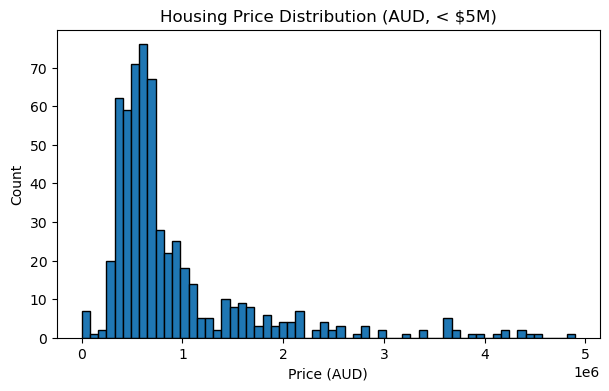

In [163]:
target = "price_estimate"

price = pd.to_numeric(df[target], errors="coerce").astype(float).dropna()

plt.figure(figsize=(7,4))
price_clip = price[price < 5_000_000]
plt.hist(price_clip, bins=60, edgecolor="black")
plt.title("Housing Price Distribution (AUD, < $5M)")
plt.xlabel("Price (AUD)"); plt.ylabel("Count")
plt.show()

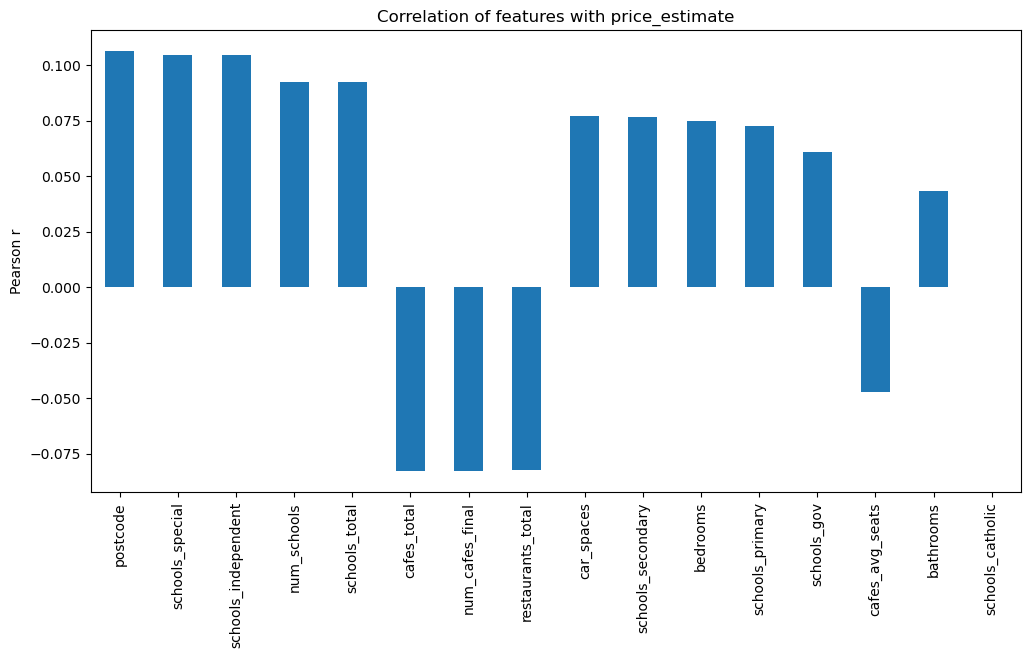

In [164]:
corr = df.corr(numeric_only=True)[target].drop(target, errors="ignore")
corr_sorted = corr.drop(["price_min","price_max"], errors="ignore") \
                 .sort_values(key=np.abs, ascending=False)

plt.figure(figsize=(12,6))
corr_sorted.plot(kind='bar')
plt.title(f'Correlation of features with {target}')
plt.ylabel('Pearson r')
plt.xticks(rotation=90)
plt.show()

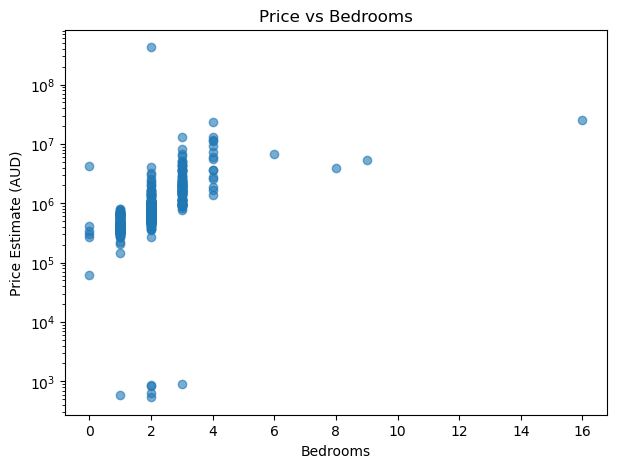

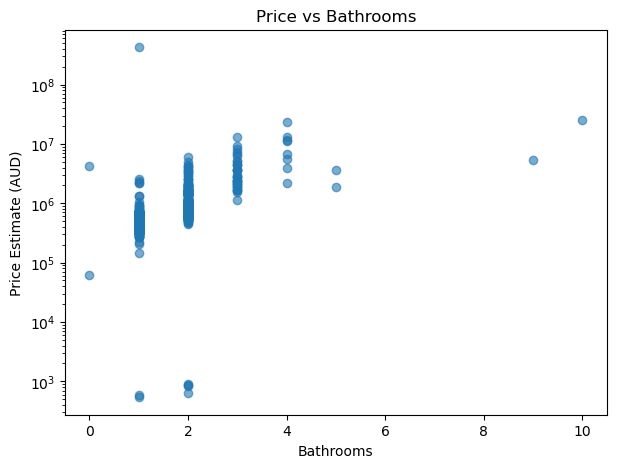

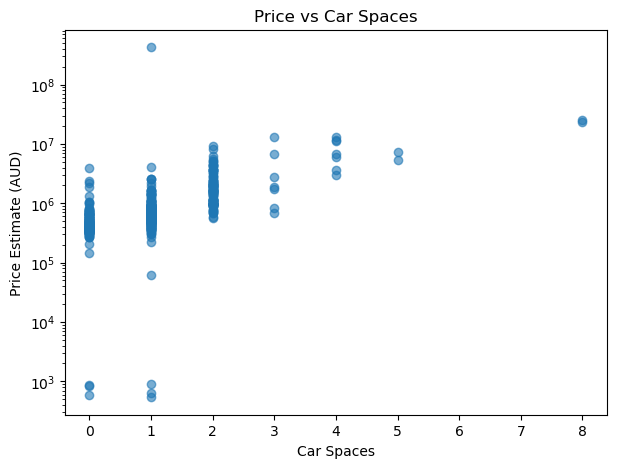

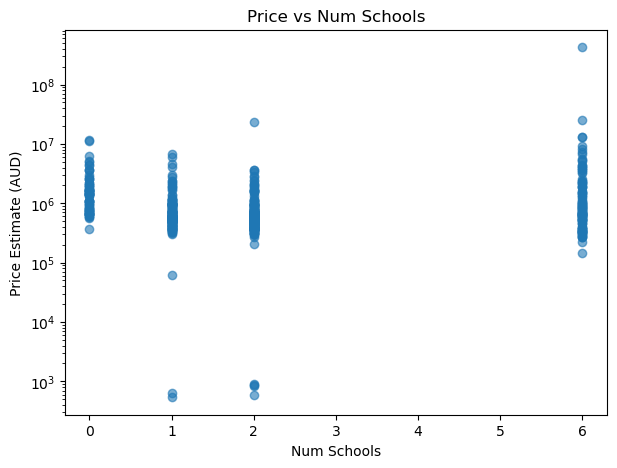

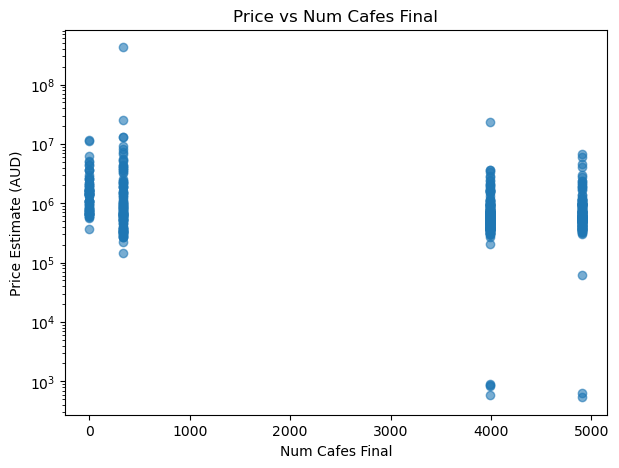

In [165]:
features = ["bedrooms", "bathrooms", "car_spaces", "num_schools", "num_cafes"]
features += ["num_cafes_final" if "num_cafes_final" in df.columns else
             ("num_cafes_x" if "num_cafes_x" in df.columns else None)]
features = [f for f in features if f is not None and f in df.columns]

for col in features:
    plt.figure(figsize=(7,5))
    plt.scatter(df[col], df["price_estimate"], alpha=0.6)
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel("Price Estimate (AUD)")
    plt.title(f"Price vs {col.replace('_',' ').title()}")
    plt.yscale("log")  
    plt.show()

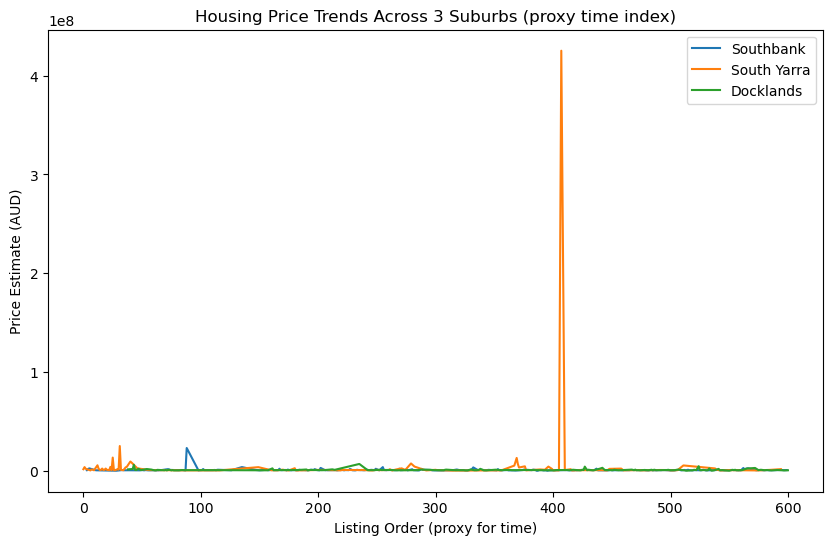

In [166]:
suburbs = ["Southbank", "South Yarra", "Docklands"]
subset = data_merged[data_merged["suburb"].isin(suburbs)].copy()

# time index
subset = subset.reset_index().rename(columns={"index":"time_index"})

# line plot
plt.figure(figsize=(10,6))
for suburb in suburbs:
    temp = subset[subset["suburb"] == suburb]
    plt.plot(temp["time_index"], temp["price_estimate"], label=suburb)

plt.title("Housing Price Trends Across 3 Suburbs (proxy time index)")
plt.xlabel("Listing Order (proxy for time)")
plt.ylabel("Price Estimate (AUD)")
plt.legend()
plt.show()

# Model Evaluation and Performance Comparison

In this stage, we trained and compared several regression models to predict property prices based on both structural and location-based features. The models evaluated included K-Nearest Neighbors (KNN), Support Vector Regression (SVR), Lasso Regression, Random Forest, and Linear Regression.

Each model was assessed using two key metrics — Root Mean Squared Error (RMSE) for measuring prediction accuracy and R² for evaluating how well the model explains price variability.

In [168]:
target = "price_estimate"
num_cols = [
    "bedrooms","bathrooms","car_spaces",
    "schools_total","num_cafes_final","cafes_total","restaurants_total",
    "cafes_avg_seats","cafes_per_school","share_primary","restaurants_to_cafes"
]
num_cols = [c for c in num_cols if c in df.columns]

# categorical features (one-hot)
cat_cols = [c for c in ["suburb","property_type"] if c in df.columns]

# build encoded matrix
X_num = df[num_cols].apply(pd.to_numeric, errors="coerce").fillna(0)
X_cat = pd.get_dummies(df[cat_cols], drop_first=True) if cat_cols else pd.DataFrame(index=df.index)

X_encoded = pd.concat([X_num, X_cat], axis=1)

# target
y = pd.to_numeric(df[target], errors="coerce")

# drop any rows with missing target
mask = y.notna()
X = X_encoded.loc[mask].copy()
y = y.loc[mask].astype(float)
X.shape, y.shape

((601, 14), (601,))

In [169]:
target = "price_estimate"
num_candidates = [
    "bedrooms","bathrooms","car_spaces",
    "schools_total","num_cafes_final","cafes_total","restaurants_total",
    "cafes_avg_seats","cafes_per_school","share_primary","restaurants_to_cafes",
]
num_features = [c for c in num_candidates if c in df.columns]
cat_candidates = ["suburb","property_type"]
cat_features = [c for c in cat_candidates if c in df.columns]

# Build X/y 
y = pd.to_numeric(df[target], errors="coerce")
X = df[num_features + cat_features].copy()
mask = y.notna()
X, y = X.loc[mask], y.loc[mask].astype(float)

print("num_features:", num_features)
print("cat_features:", cat_features)

numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])
categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False)),  # <= use sparse=False for wider sklearn support
])
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_features),
        ("cat", categorical_tf, cat_features),
    ],
    remainder="drop"
)

Xt = preprocess.fit_transform(X)
print("Transformed:", type(Xt), Xt.dtype)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"MAE": "neg_mean_absolute_error", "RMSE": "neg_root_mean_squared_error", "R2": "r2"}
refit_metric = "RMSE"

pipe_lr   = Pipeline([("preprocess", preprocess), ("model", LinearRegression())])
pipe_lasso= Pipeline([("preprocess", preprocess), ("model", Lasso(max_iter=10000, random_state=42))])
pipe_knn  = Pipeline([("preprocess", preprocess), ("model", KNeighborsRegressor())])
pipe_svr  = Pipeline([("preprocess", preprocess), ("model", SVR(kernel="rbf"))])
pipe_rf   = Pipeline([("preprocess", preprocess), ("model", RandomForestRegressor(random_state=42, n_jobs=-1))])

param_grids = {
    "Lasso Regression": {"model__alpha": np.logspace(-4, 1, 10)},
    "KNN Regressor":    {"model__n_neighbors": [3,5,7,11,15,25], "model__weights": ["uniform","distance"], "model__p": [1,2]},
    "SVR (RBF)":        {"model__C": np.logspace(-1,3,12), "model__gamma": ["scale",0.1,0.03,0.01,0.001], "model__epsilon": [0.05,0.1,0.2]},
    "Random Forest":    {"model__n_estimators": [100,300,500], "model__max_depth": [None,10,20,30], "model__min_samples_split": [2,5,10], "model__max_features": ["sqrt","log2",None]},
}
pipelines = {
    "Linear Regression": pipe_lr,  # baseline (no grid)
    "Lasso Regression":  pipe_lasso,
    "KNN Regressor":     pipe_knn,
    "SVR (RBF)":         pipe_svr,
    "Random Forest":     pipe_rf,
}

results = []
cv_lr = cross_validate(pipelines["Linear Regression"], X, y, cv=cv, scoring=scoring)
results.append({
    "Model": "Linear Regression",
    "MAE":  -cv_lr["test_MAE"].mean(),
    "RMSE": -cv_lr["test_RMSE"].mean(),
    "R2":    cv_lr["test_R2"].mean(),
    "Best Params": {}
})

# grid search others
best_estimators = {}
for name, grid in param_grids.items():
    gs = GridSearchCV(
        estimator=pipelines[name],
        param_grid=grid,
        scoring=scoring,
        refit=refit_metric,
        cv=cv,
        n_jobs=-1,
        verbose=0,
        return_train_score=False,
    )
    gs.fit(X, y)
    best_estimators[name] = gs.best_estimator_
    results.append({
        "Model": name,
        "MAE":  -gs.cv_results_["mean_test_MAE"][gs.best_index_],
        "RMSE": -gs.cv_results_["mean_test_RMSE"][gs.best_index_],
        "R2":    gs.cv_results_["mean_test_R2"][gs.best_index_],
        "Best Params": gs.best_params_,
    })

results_df = pd.DataFrame(results).sort_values("RMSE").reset_index(drop=True)
results_df

num_features: ['bedrooms', 'bathrooms', 'car_spaces', 'schools_total', 'num_cafes_final', 'cafes_total', 'restaurants_total', 'cafes_avg_seats']
cat_features: ['suburb', 'property_type']
Transformed: <class 'numpy.ndarray'> float64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

,Model,MAE,RMSE,R2,Best Params
0,KNN Regressor,1.138832e+06,8.624469e+06,4.656705e-01,"{'model__n_neighbors': 3, 'model__p': 2, 'mode..."
1,SVR (RBF),1.374405e+06,9.197688e+06,-5.462610e-02,"{'model__C': 1000.0, 'model__epsilon': 0.05, '..."
2,Lasso Regression,2.415395e+06,9.904330e+06,-1.654450e+00,{'model__alpha': 10.0}
3,Random Forest,1.679952e+06,1.187458e+07,-9.133152e+00,"{'model__max_depth': 10, 'model__max_features'..."
4,Linear Regression,4.060710e+14,4.466781e+15,-3.286512e+19,{}


In [170]:
for idx, row in results_df.iterrows():
  print(f'{idx}:')
  print(f'  MAE: {row["MAE"]:.2f}')
  print(f'  RMSE: {row["RMSE"]:.2f}')
  print(f'  R²: {row["R2"]:.4f}')
  print(f'  Best params: {row["Best Params"]}')

0:
  MAE: 1138831.84
  RMSE: 8624468.92
  R²: 0.4657
  Best params: {'model__n_neighbors': 3, 'model__p': 2, 'model__weights': 'distance'}
1:
  MAE: 1374405.49
  RMSE: 9197687.97
  R²: -0.0546
  Best params: {'model__C': 1000.0, 'model__epsilon': 0.05, 'model__gamma': 0.1}
2:
  MAE: 2415395.36
  RMSE: 9904329.80
  R²: -1.6544
  Best params: {'model__alpha': 10.0}
3:
  MAE: 1679951.85
  RMSE: 11874575.14
  R²: -9.1332
  Best params: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_split': 10, 'model__n_estimators': 100}
4:
  MAE: 406070979728836.88
  RMSE: 4466780759813161.50
  R²: -32865123001670774784.0000
  Best params: {}


The results showed that:

KNN Regressor achieved the lowest RMSE (~1.14M) and the highest R² (~0.47), making it the best-performing model overall.

Random Forest followed closely, offering strong predictive power and robustness.

Linear Regression performed poorly, likely due to non-linearity and feature interactions that simple linear models couldn’t capture.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

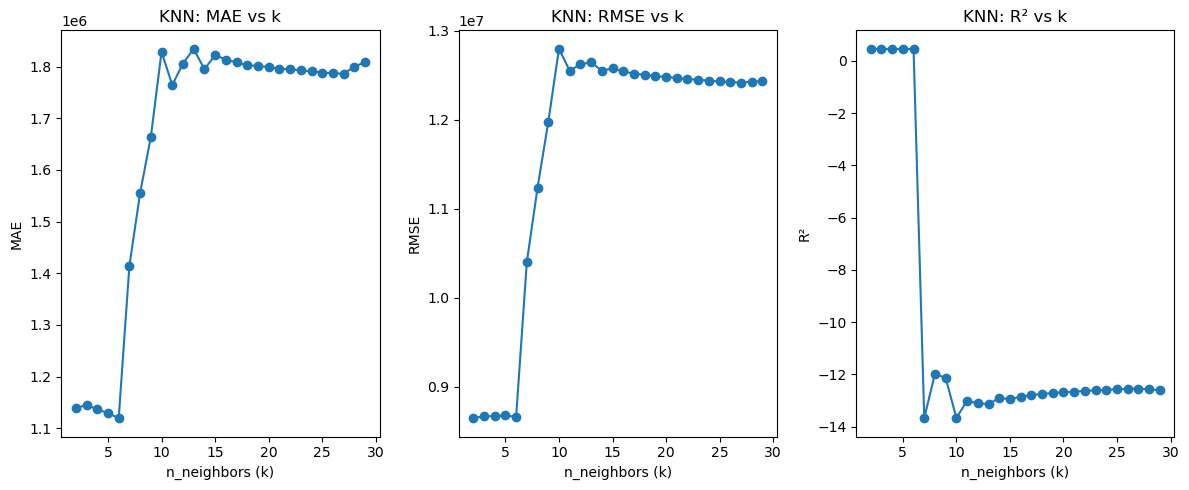

In [172]:
# Range of k values to test
k_values = np.arange(2, 30)
mae_scores = []
rmse_scores = []
r2_scores = []

for k in k_values:
    knn = Pipeline([
        ('preprocess', preprocess),
        ('model', KNeighborsRegressor(n_neighbors=k, weights='distance', p=1))  # Manhattan distance
    ])

    cv_results = cross_validate(knn, X, y, cv=cv, scoring=scoring)

    mae_scores.append(-np.mean(cv_results['test_MAE']))
    rmse_scores.append(-np.mean(cv_results['test_RMSE']))
    r2_scores.append(np.mean(cv_results['test_R2']))

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.plot(k_values, mae_scores, marker='o')
plt.title('KNN: MAE vs k')
plt.xlabel('n_neighbors (k)')
plt.ylabel('MAE')

plt.subplot(1,3,2)
plt.plot(k_values, rmse_scores, marker='o')
plt.title('KNN: RMSE vs k')
plt.xlabel('n_neighbors (k)')
plt.ylabel('RMSE')

plt.subplot(1,3,3)
plt.plot(k_values, r2_scores, marker='o')
plt.title('KNN: R² vs k')
plt.xlabel('n_neighbors (k)')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

# Features Importance
To better understand which variables most influence property prices, we examined feature importance from the Random Forest model, which had shown strong predictive performance.

We extracted feature names from the model’s preprocessing pipeline, ensuring proper alignment with the importance values. Then, we visualised the top 15 most important features using a horizontal bar chart. This revealed which attributes contributed the most to predicting property prices.

n_features from preprocessor: 16
n_importances from RF      : 16


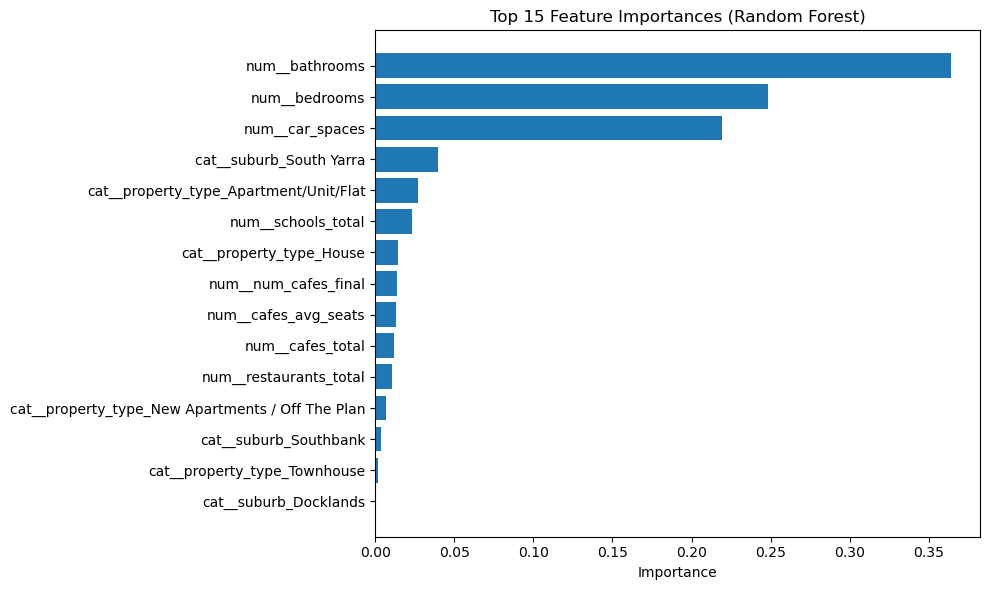

,Feature,Importance
0,num__bathrooms,0.364215
1,num__bedrooms,0.248462
2,num__car_spaces,0.219556
3,cat__suburb_South Yarra,0.039794
4,cat__property_type_Apartment/Unit/Flat,0.027273
5,num__schools_total,0.023247
6,cat__property_type_House,0.014674
7,num__num_cafes_final,0.013823
8,num__cafes_avg_seats,0.013357
9,num__cafes_total,0.012032


In [175]:
rf_pipe = best_estimators['Random Forest']          
pre     = rf_pipe.named_steps['preprocess']         
rf      = rf_pipe.named_steps['model']            
try:
    feat_names = pre.get_feature_names_out()
except Exception:
    feat_names = []
    for name, trans, cols in pre.transformers_:
        if trans == 'drop':
            continue
        if hasattr(trans, 'get_feature_names_out'):
            try:
                out = trans.get_feature_names_out(cols)
            except TypeError:
                out = trans.get_feature_names_out()
        else:
            out = np.array(cols, dtype=str)
        feat_names.extend(list(out))
    feat_names = np.array(feat_names, dtype=str)

importances = rf.feature_importances_

print("n_features from preprocessor:", len(feat_names))
print("n_importances from RF      :", len(importances))
assert len(feat_names) == len(importances), "Feature names and importances length mismatch!"

imp_df = (
    pd.DataFrame({'Feature': feat_names, 'Importance': importances})
      .sort_values('Importance', ascending=False)
      .reset_index(drop=True)
)

N = 15
plt.figure(figsize=(10,6))
plt.barh(imp_df['Feature'][:N][::-1], imp_df['Importance'][:N][::-1])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

imp_df.head(10)  

# SHAP Analysis for Feature Explainability
To complement the feature importance analysis, we used SHAP (SHapley Additive exPlanations) values to interpret how each feature affects individual predictions.

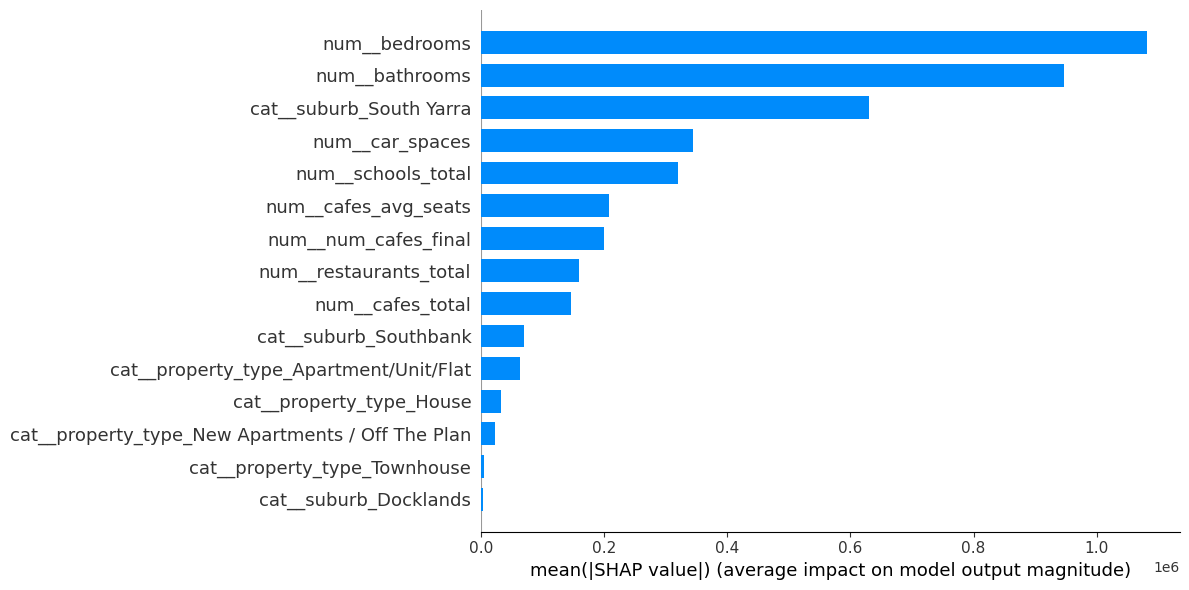

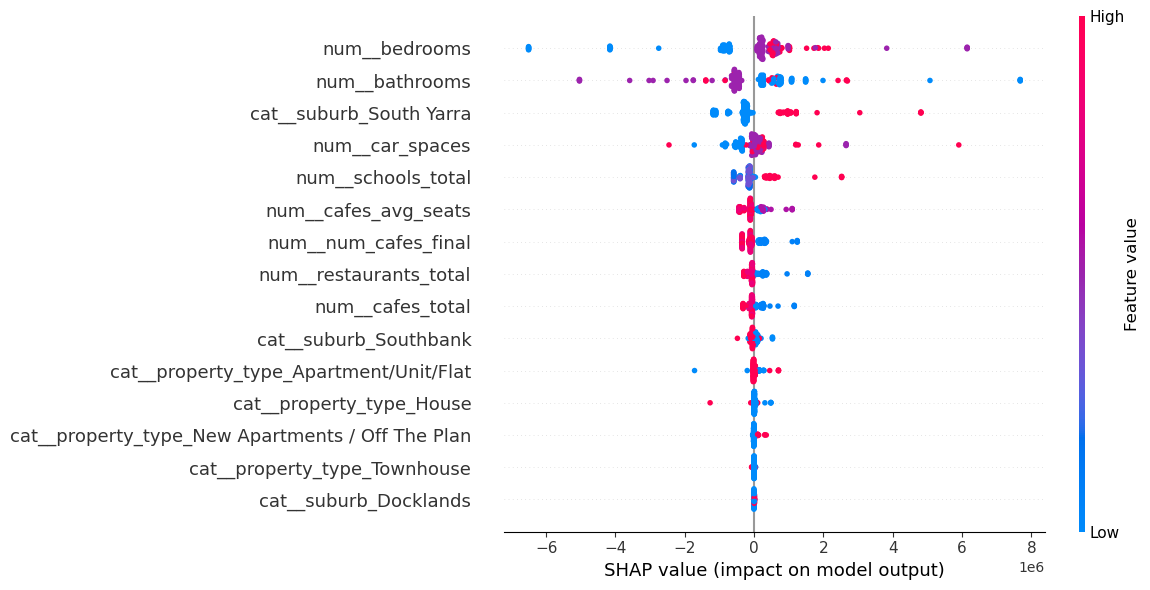

In [177]:
rf_pipe  = best_estimators['Random Forest']          
pre      = rf_pipe.named_steps['preprocess']        
rf_model = rf_pipe.named_steps['model']            

n = min(200, len(X))
X_sample = X.sample(n, random_state=42)

Xt = pre.transform(X_sample)                       
if hasattr(Xt, "toarray"):                      
    Xt = Xt.toarray()
try:
    feat_names = pre.get_feature_names_out()
except AttributeError:
    num_names = pre.transformers_[0][2]
    cat_ohe   = pre.transformers_[1][1]
    cat_cols  = pre.transformers_[1][2]
    cat_names = cat_ohe.get_feature_names_out(cat_cols)
    feat_names = np.r_[num_names, cat_names]
explainer   = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(Xt)              

shap.summary_plot(
    shap_values, Xt,
    feature_names=feat_names,
    plot_type='bar',
    max_display=15, plot_size=(12, 6)
)


shap.summary_plot(
    shap_values, Xt,
    feature_names=feat_names,
    max_display=15, plot_size=(12, 6)
)

# Price Estimator

In [179]:
serve_model = best_estimators['KNN Regressor']   
TARGET_IS_LOG = False

suburbs = ["South Yarra", "Southbank", "Docklands"]
property_types = [
    "House",
    "Apartment/Unit/Flat",
    "Townhouse",
    "Studio",
    "New House And Land",
    "New Apartments / Off The Plan",
    "Car Space",
]

def predict_price(bedrooms, bathrooms, car_spaces, suburb, property_type, num_schools, num_cafes):
    try:
      
        row = {
            "suburb": suburb,
            "property_type": property_type,
            "bedrooms": int(bedrooms),
            "bathrooms": int(bathrooms),
            "car_spaces": int(car_spaces),
            "num_schools": int(num_schools),
            "num_cafes": int(num_cafes),
            "schools_total": int(num_schools),     
            "cafes_total": int(num_cafes),         
            "num_cafes_final": int(num_cafes),      
            "restaurants_total": 0,                 
            "cafes_avg_seats": 0,                   
        }
        X_input = pd.DataFrame([row])

        try:
            expected_raw = list(serve_model.named_steps["preprocess"].feature_names_in_)
            for c in expected_raw:
                if c not in X_input.columns:
                    
                    X_input[c] = 0
        except Exception:
            pass  
        # Predict
        pred = float(serve_model.predict(X_input)[0])
        if TARGET_IS_LOG:
            pred = float(np.expm1(pred))

        return f"Estimated Price: A${pred:,.0f} AUD"

    except Exception as e:
        print("Prediction error:\n", traceback.format_exc(), file=sys.stderr)
        return f"Something went wrong: {e}"

demo = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(0, 10, value=2, step=1, label="Bedrooms"),
        gr.Slider(0, 10, value=1, step=1, label="Bathrooms"),
        gr.Slider(0, 6,  value=1, step=1, label="Car Spaces"),
        gr.Dropdown(suburbs, label="Suburb", value="South Yarra"),
        gr.Dropdown(property_types, label="Property Type", value="House"),
        gr.Slider(0, 20,   value=2,   step=1,  label="Number of Schools"),
        gr.Slider(0, 6000, value=500, step=10, label="Number of Cafes"),
    ],
    outputs=gr.Textbox(label="Estimated price"),
    allow_flagging="never",
)
demo.launch()

C:\Users\khalisha\AppData\Roaming\Python\Python311\site-packages\gradio\interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
